PCA on Iris Dataset for visualization\
Dataset is taken from https://archive.ics.uci.edu/ml/datasets/iris

In [12]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [13]:
df = pd.read_csv("/content/iris.data", names=["F1", "F2", "F3", "F4", "Plant Type"])
df

,F1,F2,F3,F4,Plant Type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
df.head(5)

,F1,F2,F3,F4,Plant Type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Separate features and label.

In [15]:
features = ["F1","F2","F3","F4"]
features = df.loc[:, features].values

label = df.loc[:, ["Plant Type"]].values

PCA is affected by scale. Hence standarize the dataset before applying PCA

In [16]:
features = StandardScaler().fit_transform(features)

Apply PCA and get top two principle components

In [17]:
pca = PCA(n_components=2)
X = pca.fit_transform(features)

In [18]:
df_pc = pd.DataFrame(data=X, columns=["PC1", "PC2"])
df_pc['Plant Type'] = df['Plant Type']
df_pc

,PC1,PC2,Plant Type
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


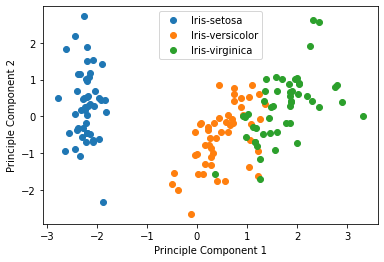

In [19]:
groups = df_pc.groupby("Plant Type")
for name, group in groups:
  plt.plot(group["PC1"], group["PC2"], marker="o", lineStyle="", label=name)
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.legend()
plt.savefig("PCA.pdf", bbox_inches='tight')